In [1]:
import numpy as np
import pandas as pd 
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt


In [2]:
import tensorflow as tf
from tensorflow import keras


In [3]:
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()

In [6]:
housing

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n\nCalifornia Housing dataset\n--------------------

In [8]:
housing.feature_names

['MedInc',
 'HouseAge',
 'AveRooms',
 'AveBedrms',
 'Population',
 'AveOccup',
 'Latitude',
 'Longitude']

In [12]:
from sklearn.model_selection import train_test_split
X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target, random_state= 42)
X_train, X_valid, y_train, y_valid = train_test_split (X_tain_full, y_train_full, random_state = 42)


In [24]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test) 

In [25]:
np.random.seed(42)
tf.random.set_seed(42)

In [26]:
X_train.shape

(11610, 8)

In [28]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation = 'relu', input_shape = [8]),
    keras.layers.Dense(30, activation = 'relu'),
    keras.layers.Dense(1)
])
# keras.layers.Dense (30, activation ='relu', input_shape = X_train.shape[1:])

In [32]:
model.compile(loss= 'mean_squared_error',
             optimizer= keras.optimizers.SGD(lr= 1e-3),
             metrics=['mae'])             

In [33]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 30)                270       
_________________________________________________________________
dense_1 (Dense)              (None, 30)                930       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 31        
Total params: 1,231
Trainable params: 1,231
Non-trainable params: 0
_________________________________________________________________


In [45]:
model_history = model.fit(X_train, y_train, epochs=150, validation_data=(X_valid, y_valid))

Train on 11610 samples, validate on 3870 samples
Epoch 1/150
11610/11610 [==============================] - 1s 80us/sample - loss: 0.3359 - mae: 0.4086 - val_loss: 0.3371 - val_mae: 0.4049
Epoch 2/150
11610/11610 [==============================] - 1s 75us/sample - loss: 0.3358 - mae: 0.4089 - val_loss: 0.3183 - val_mae: 0.3982
Epoch 3/150
11610/11610 [==============================] - 1s 76us/sample - loss: 0.3353 - mae: 0.4081 - val_loss: 0.3299 - val_mae: 0.4011
Epoch 4/150
11610/11610 [==============================] - 1s 75us/sample - loss: 0.3349 - mae: 0.4081 - val_loss: 0.3224 - val_mae: 0.3986
Epoch 5/150
11610/11610 [==============================] - 1s 76us/sample - loss: 0.3345 - mae: 0.4075 - val_loss: 0.3189 - val_mae: 0.3987
Epoch 6/150
11610/11610 [==============================] - 1s 75us/sample - loss: 0.3341 - mae: 0.4073 - val_loss: 0.3549 - val_mae: 0.4045
Epoch 7/150
11610/11610 [==============================] - 1s 78us/sample - loss: 0.3337 - mae: 0.4075 - val_lo

Epoch 59/150
11610/11610 [==============================] - 1s 78us/sample - loss: 0.3177 - mae: 0.3958 - val_loss: 0.3043 - val_mae: 0.3878
Epoch 60/150
11610/11610 [==============================] - 1s 74us/sample - loss: 0.3173 - mae: 0.3952 - val_loss: 0.3353 - val_mae: 0.3960
Epoch 61/150
11610/11610 [==============================] - 1s 73us/sample - loss: 0.3172 - mae: 0.3952 - val_loss: 0.3108 - val_mae: 0.3918
Epoch 62/150
11610/11610 [==============================] - 1s 73us/sample - loss: 0.3168 - mae: 0.3954 - val_loss: 0.3968 - val_mae: 0.3941
Epoch 63/150
11610/11610 [==============================] - 1s 74us/sample - loss: 0.3170 - mae: 0.3948 - val_loss: 0.3057 - val_mae: 0.3896
Epoch 64/150
11610/11610 [==============================] - 1s 76us/sample - loss: 0.3161 - mae: 0.3942 - val_loss: 0.3312 - val_mae: 0.3952
Epoch 65/150
11610/11610 [==============================] - 1s 74us/sample - loss: 0.3162 - mae: 0.3949 - val_loss: 0.3416 - val_mae: 0.3913
Epoch 66/150


Epoch 117/150
11610/11610 [==============================] - 1s 75us/sample - loss: 0.3102 - mae: 0.3864 - val_loss: 0.7106 - val_mae: 0.3969
Epoch 118/150
11610/11610 [==============================] - 1s 73us/sample - loss: 0.3077 - mae: 0.3878 - val_loss: 0.9007 - val_mae: 0.4001
Epoch 119/150
11610/11610 [==============================] - 1s 76us/sample - loss: 0.3065 - mae: 0.3861 - val_loss: 0.6347 - val_mae: 0.3920
Epoch 120/150
11610/11610 [==============================] - 1s 74us/sample - loss: 0.3077 - mae: 0.3879 - val_loss: 1.1394 - val_mae: 0.4025
Epoch 121/150
11610/11610 [==============================] - 1s 74us/sample - loss: 0.3076 - mae: 0.3860 - val_loss: 1.3753 - val_mae: 0.4040
Epoch 122/150
11610/11610 [==============================] - 1s 76us/sample - loss: 0.3126 - mae: 0.3874 - val_loss: 1.8705 - val_mae: 0.4152
Epoch 123/150
11610/11610 [==============================] - 1s 76us/sample - loss: 0.3152 - mae: 0.3868 - val_loss: 1.8131 - val_mae: 0.4147
Epoch 

In [47]:
mae_test = model.evaluate(X_test, y_test)

5160/1 [================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

In [42]:
model_history.history

{'loss': [0.3947070919009347,
  0.3922769972366264,
  0.3897686025533668,
  0.38726005661626195,
  0.3850787088031095,
  0.38268500666080313,
  0.38030753937597217,
  0.3786127851555616,
  0.3765435923696283,
  0.3746875212738783,
  0.37276261181897075,
  0.3710735721386886,
  0.36954845857455954,
  0.36833741124799596,
  0.36666162312800876,
  0.36543722717952976,
  0.3644434817590968,
  0.3629574676252048,
  0.36198405379575455,
  0.36091953381498143,
  0.3599510573806894,
  0.3588091454507974,
  0.3576643546833035,
  0.3569531995915422,
  0.35592012690327274,
  0.3548704185227091,
  0.3544300434843001,
  0.3532084208665276,
  0.3525279219349739,
  0.3518401406326754,
  0.3510090423236111,
  0.35046107588042275,
  0.34977467474395296,
  0.34898017015465366,
  0.3484571220749519,
  0.3478346993448814,
  0.34712442626324735,
  0.3468647759860184,
  0.3461692951343678,
  0.3454957501114082,
  0.34503047719379626,
  0.34479228632137965,
  0.3440031228858166,
  0.3437807965904962,
  0.343

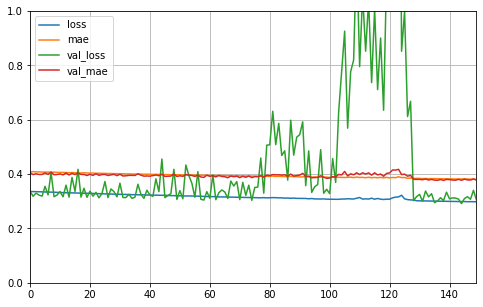

In [46]:
pd.DataFrame(model_history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [48]:
X_new = X_test[:3]
y_pred = model.predict(X_new)
print(y_pred)
print(y_test[:3])

[[0.58782476]
 [1.6476144 ]
 [4.6094956 ]]
[0.477   0.458   5.00001]
